In [1]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lecture 25 ##

## Bootstrap Review: Mean Maternal Age

In [2]:
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


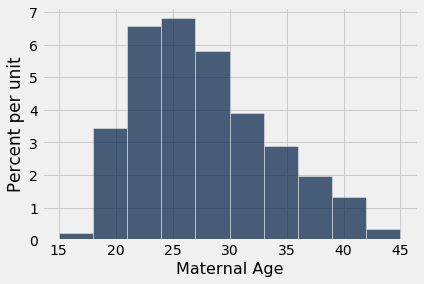

In [3]:
births.hist('Maternal Age')

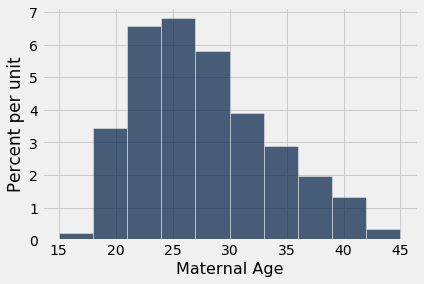

In [4]:
births.hist('Maternal Age')

In [5]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [6]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [7]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

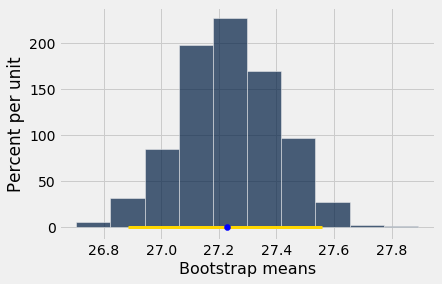

In [8]:
Table().with_column('Bootstrap means', bootstrap_means).hist()
plots.plot([left,right], [0,0], color="gold", lw=3, zorder=1);
plots.scatter(mean_age,0,color="blue", zorder=2);

## Average (Mean) ##

In [9]:
values = make_array(2, 3, 3, 9)

In [10]:
sum(values)/len(values)

4.25

In [11]:
np.average(values)

4.25

In [12]:
np.mean(values)

4.25

In [13]:
(2 + 3 + 3 + 9)/4

4.25

In [14]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [15]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


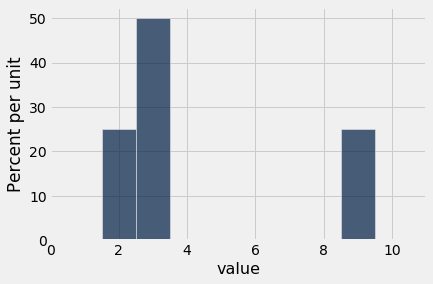

In [16]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [17]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = np.append(np.append(np.full(10, 2), np.full(20, 3)),
                     np.full(10, 9))

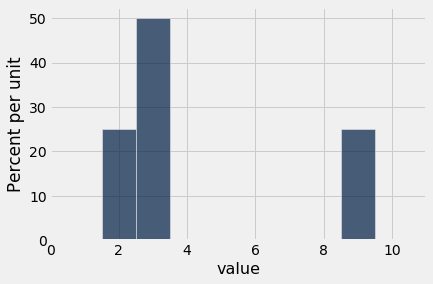

In [18]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [19]:
np.average(values)

4.25

In [20]:
np.average(new_vals)

4.25

### Discussion Question

In [21]:
nba = Table.read_table('nba2013.csv')
nba

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


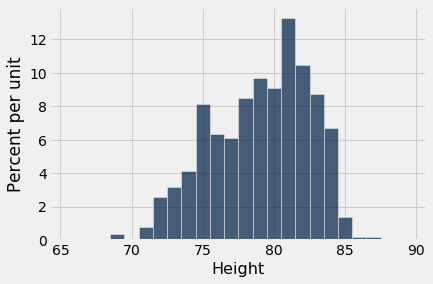

In [22]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [23]:
heights = nba.column('Height')
percentile(50, heights)

80

In [24]:
np.average(heights)

79.06534653465347

## Standard Deviation ##

In [25]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [26]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [27]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [28]:
sum(deviations)

0.0

In [29]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [30]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [31]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [32]:
np.std(values)

2.7726341266023544